In [ ]:
import pandas as pd

## **Data Loading and Data cleaning**

In [ ]:
df=pd.read_csv('/content/tesla.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [ ]:
df.shape

(1692, 7)

In [ ]:
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Adj Close,float64


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Adj Close,0


In [ ]:
df['Date'].unique()

array(['6/29/2010', '6/30/2010', '7/1/2010', ..., '3/15/2017',
       '3/16/2017', '3/17/2017'], dtype=object)

In [ ]:
df['Date']

,Date
0,6/29/2010
1,6/30/2010
2,7/1/2010
3,7/2/2010
4,7/6/2010
...,...
1687,3/13/2017
1688,3/14/2017
1689,3/15/2017
1690,3/16/2017


In [ ]:
(df.drop('Date',axis=1)).corr()

,Open,High,Low,Close,Volume,Adj Close
Open,1.000000,0.999623,0.999605,0.999233,0.407515,0.999233
High,0.999623,1.000000,0.999521,0.999691,0.416466,0.999691
Low,0.999605,0.999521,1.000000,0.999656,0.397615,0.999656
Close,0.999233,0.999691,0.999656,1.000000,0.406907,1.000000
Volume,0.407515,0.416466,0.397615,0.406907,1.000000,0.406907
Adj Close,0.999233,0.999691,0.999656,1.000000,0.406907,1.000000


In [ ]:
import matplotlib.pyplot as plt

**Data Visualisation**

***Univariate*** Analysis

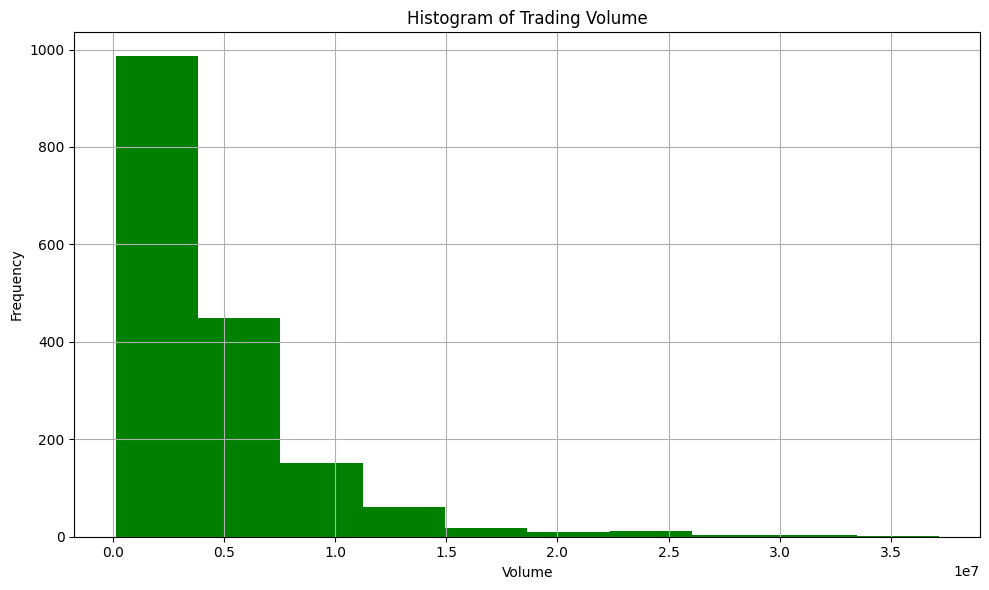

In [ ]:
plt.figure(figsize=(10, 6))
df['Volume'].hist(bins=10, color='green')
plt.title("Histogram of Trading Volume")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

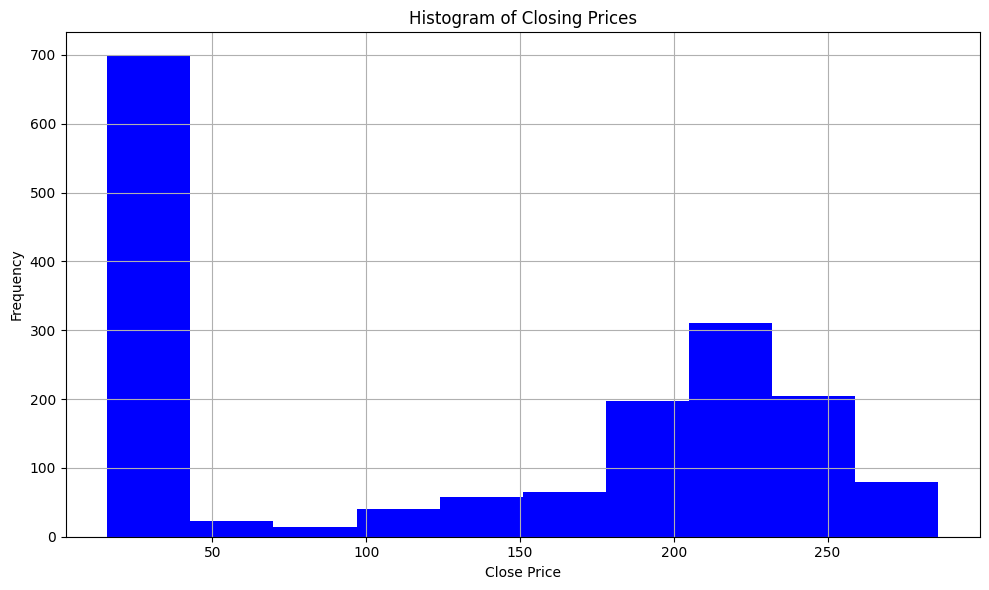

In [ ]:
plt.figure(figsize=(10, 6))
df['Close'].hist(bins=10, color='blue')
plt.title("Histogram of Closing Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

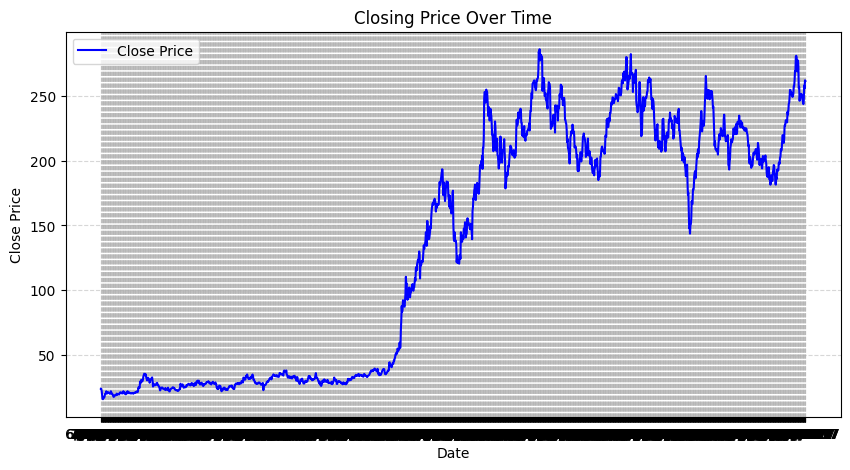

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()


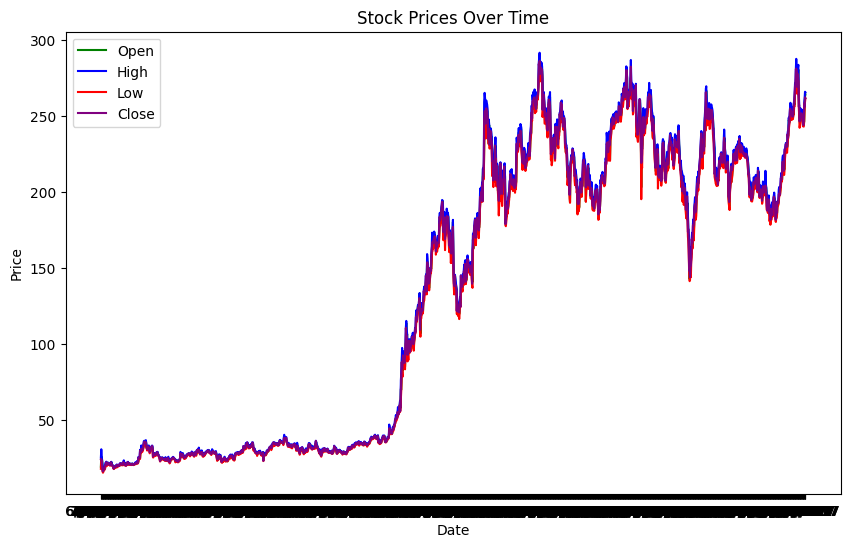

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Open'], label='Open', color='green')
plt.plot(df['Date'], df['High'], label='High', color='blue')
plt.plot(df['Date'], df['Low'], label='Low', color='red')
plt.plot(df['Date'], df['Close'], label='Close', color='purple')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Multivariate Analysis

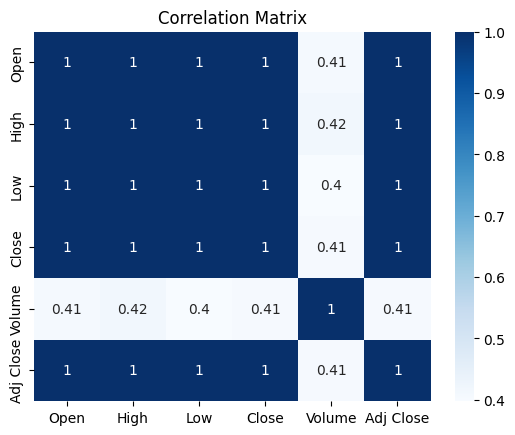

In [ ]:
import seaborn as sns

correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()


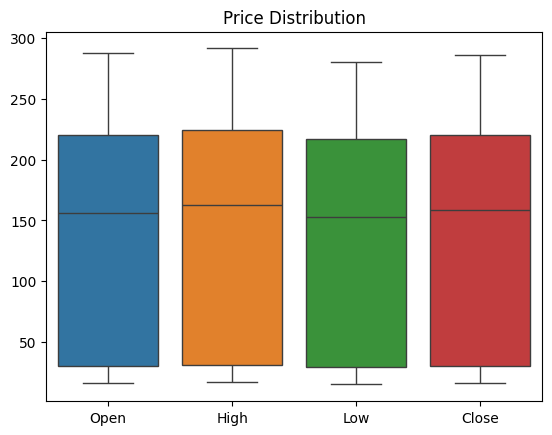

In [ ]:
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Price Distribution')
plt.show()

Bivariate Analysis

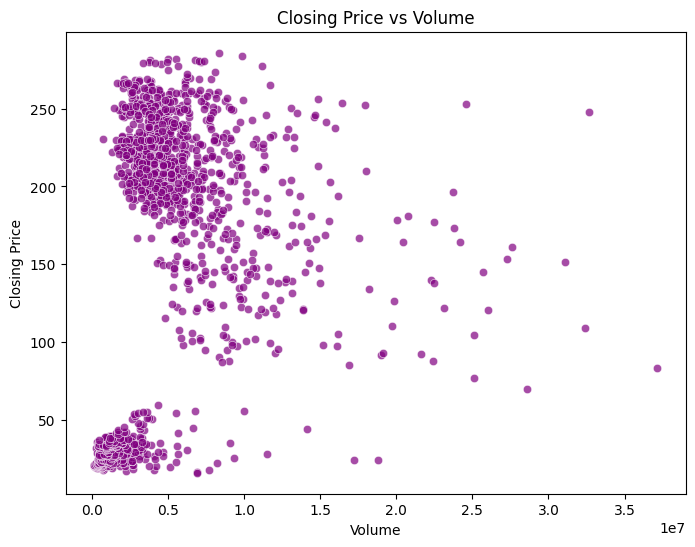

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Volume'], y=df['Close'], alpha=0.7, color='purple')
plt.title('Closing Price vs Volume')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.show()

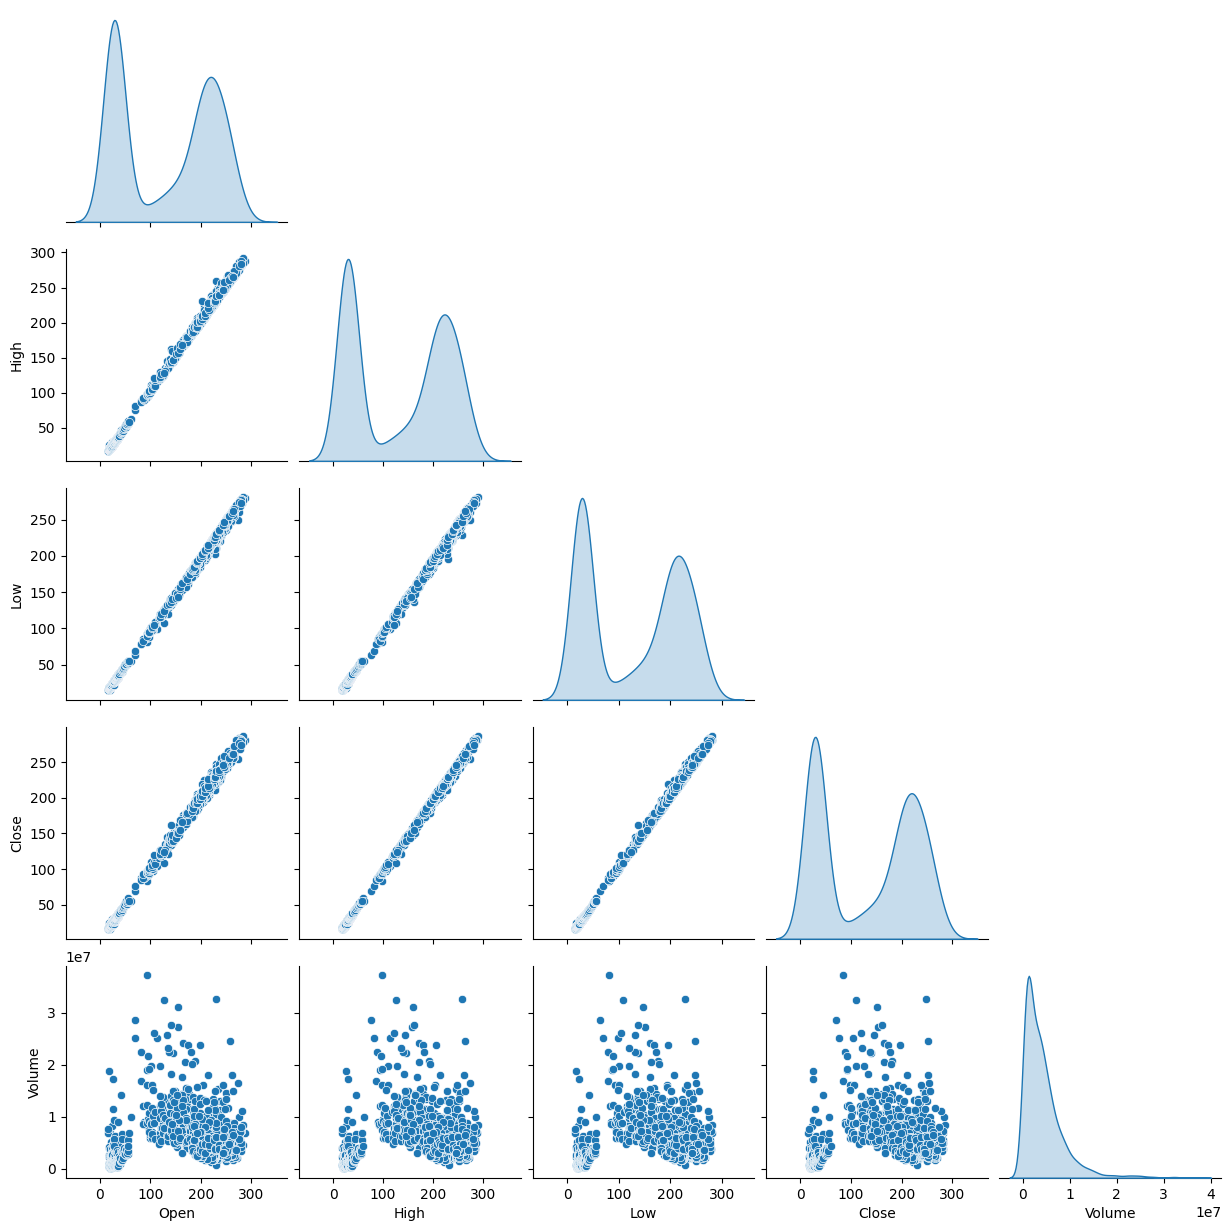

In [ ]:
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume']], diag_kind='kde', corner=True)
plt.show()


**Detecting Outliers**

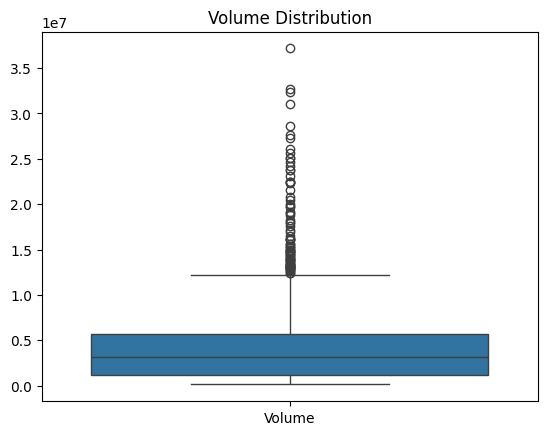

In [ ]:
sns.boxplot(data=df[['Volume']])
plt.title('Volume Distribution')
plt.show()

**Z_Score**

In [ ]:
import numpy as np
numeric_columns = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs((df[numeric_columns] - df[numeric_columns].mean()) / df[numeric_columns].std())

outliers = (z_scores > 3).sum()+(z_scores < -3).sum()
print("\nOutliers per column:")
print(outliers)


Outliers per column:
Open          0
High          0
Low           0
Close         0
Volume       34
Adj Close     0
dtype: int64


**Skewness**

Open        -0.027382
High        -0.034205
Low         -0.021037
Close       -0.027977
Volume       2.538785
Adj Close   -0.027977
dtype: float64


<ipython-input-25-6dad9134b294>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skewness.index, y=skewness.values,palette='viridis')


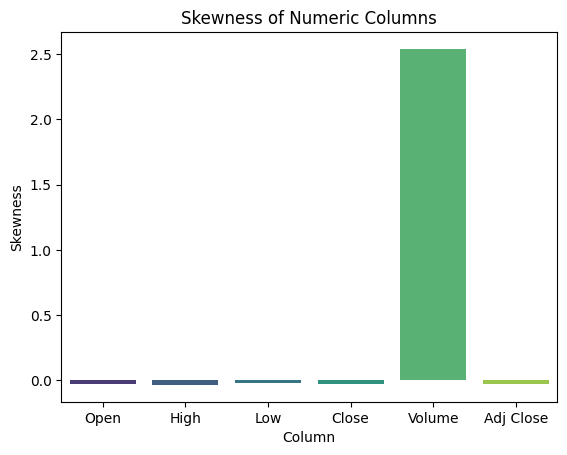

In [ ]:
from scipy.stats import skew
skewness = df[numeric_columns].apply(lambda x: skew(x.dropna()))
sns.barplot(x=skewness.index, y=skewness.values,palette='viridis')
print(skewness)
plt.title('Skewness of Numeric Columns')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.show()

**Kurtosis**

<ipython-input-26-e136bed7fcd7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kurtosis.index, y=kurtosis.values,palette='viridis')


Open        -1.753629
High        -1.757042
Low         -1.750665
Close       -1.753760
Volume       9.749834
Adj Close   -1.753760
dtype: float64


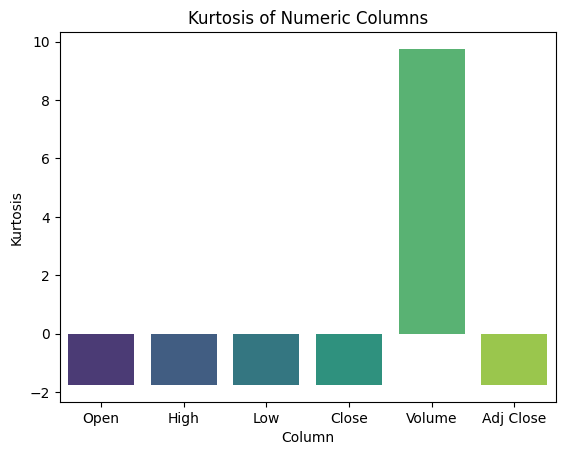

In [ ]:
from scipy.stats import kurtosis
kurtosis = df[numeric_columns].apply(lambda x: kurtosis(x.dropna()))
sns.barplot(x=kurtosis.index, y=kurtosis.values,palette='viridis')
print(kurtosis)
plt.title('Kurtosis of Numeric Columns')
plt.xlabel('Column')
plt.ylabel('Kurtosis')
plt.show()

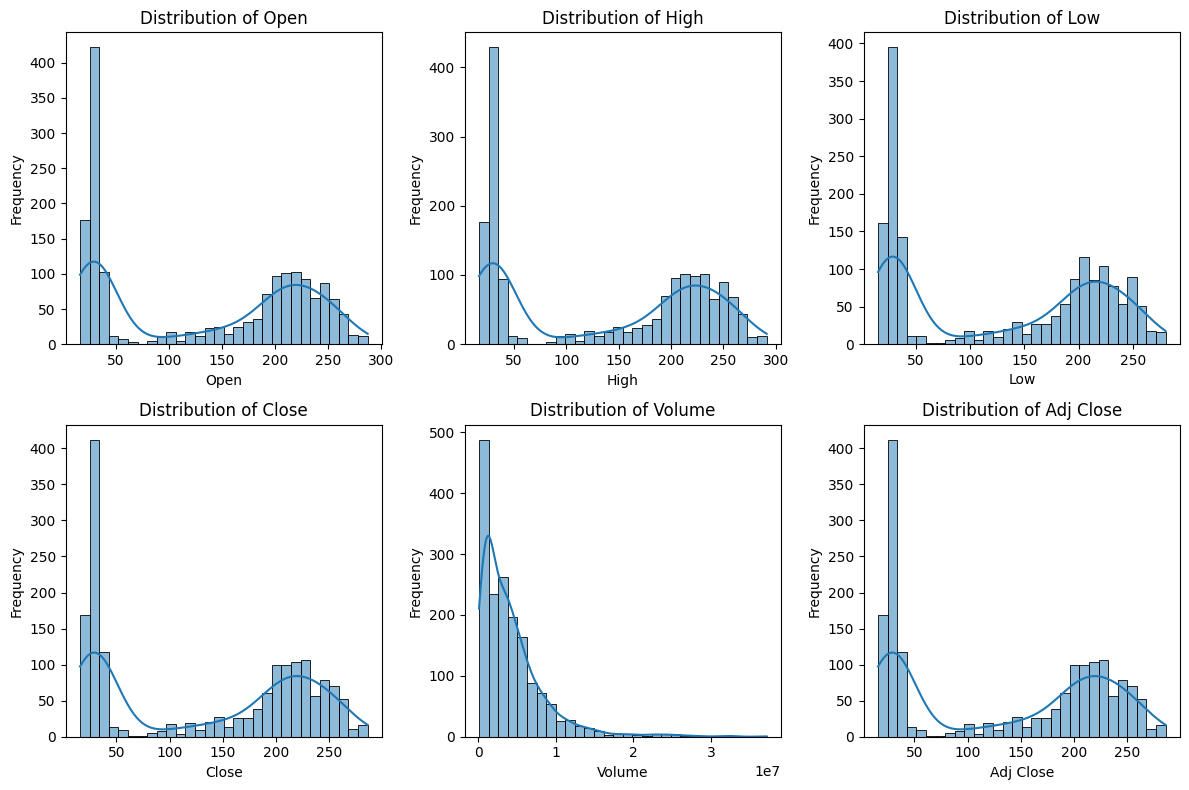

In [ ]:

plt.figure(figsize=(12, 8))


for i, col in enumerate(numeric_columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

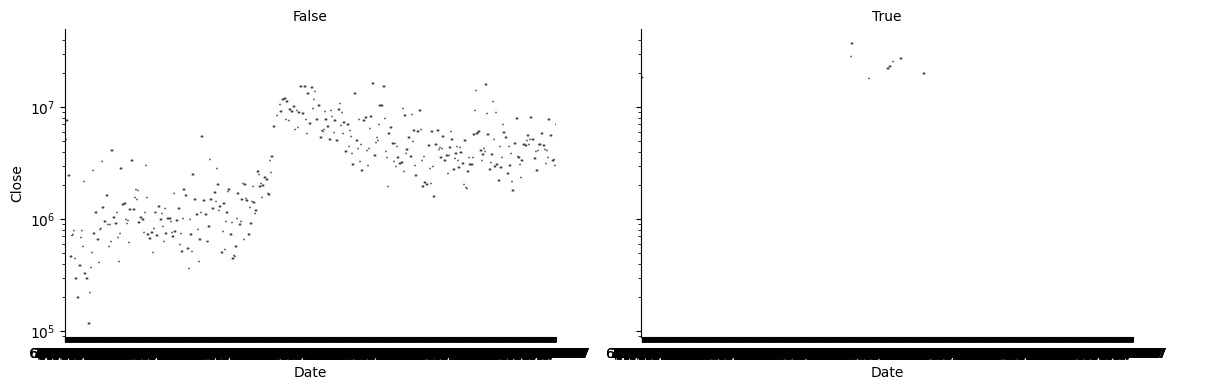

In [ ]:
df['is_outlier'] = (z_scores > 3).any(axis=1)
g = sns.catplot(
    data=df,
    x="Date",
    y="Volume",
    kind="box",
    col="is_outlier",
    col_wrap=2,
    height=4,
    aspect=1.5,
)
g.set_titles("{col_name}")
g.set_axis_labels("Date", "Close")
g.set(yscale="log")
g.tight_layout()
plt.show()

In [ ]:
tesla_data_outliers = df[(z_scores > 3).any(axis=1)]
print("\nRows with outliers:")
print(tesla_data_outliers.head())


Rows with outliers:
          Date       Open       High        Low      Close    Volume  \
0    6/29/2010  19.000000  25.000000  17.540001  23.889999  18766300   
1    6/30/2010  25.790001  30.420000  23.299999  23.830000  17187100   
720   5/9/2013  70.120003  75.769997  63.689999  69.400002  28605000   
721  5/10/2013  69.650002  81.000000  69.250000  76.760002  25082600   
722  5/13/2013  80.989998  88.000000  79.150002  87.800003  22416900   

     Adj Close  is_outlier  
0    23.889999        True  
1    23.830000        True  
720  69.400002        True  
721  76.760002        True  
722  87.800003        True  


In [ ]:

q1 = df['Volume'].quantile(0.25)
q3 = df['Volume'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_lower = df[df['Volume'] <= lower_bound]
outliers_upper = df[df['Volume'] >= upper_bound]
outliers_count = outliers_lower.shape[0] + outliers_upper.shape[0]
outliers_count


80

**Feature Engineering**

Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   ##Z-Score Standardization (x-mu/sigma)
df[['Open', 'Close','High','Low','Adj Close']] = scaler.fit_transform(df[['Open', 'Close','High','Low','Adj Close']])
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,is_outlier
0,6/29/2010,-1.203215,-1.147419,-1.211450,-1.151173,18766300,-1.151173,True
1,6/30/2010,-1.131197,-1.090764,-1.149400,-1.151809,17187100,-1.151809,True
2,7/1/2010,-1.139576,-1.137802,-1.182041,-1.171642,8218800,-1.171642,False
3,7/2/2010,-1.160789,-1.167280,-1.198846,-1.200915,5139800,-1.200915,False
4,7/6/2010,-1.192608,-1.199684,-1.229871,-1.233688,6866900,-1.233688,False


In [ ]:
for col in df.columns:
    print(col,":", len(df[col].unique()),' labels')

Date : 1692  labels
Open : 1464  labels
High : 1470  labels
Low : 1468  labels
Close : 1528  labels
Volume : 1676  labels
Adj Close : 1528  labels
is_outlier : 2  labels


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()   #(X-Xmin/(Xmax-Xmin))
df[['Open', 'Close','High','Low','Adj Close']] = scaler.fit_transform(df[['Open', 'Close','High','Low','Adj Close']])
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,is_outlier
0,6/29/2010,0.010533,0.030460,0.009645,0.029936,18766300,0.029936,True
1,6/30/2010,0.035539,0.050184,0.031347,0.029714,17187100,0.029714,True
2,7/1/2010,0.032630,0.033808,0.019931,0.022795,8218800,0.022795,False
3,7/2/2010,0.025264,0.023545,0.014053,0.012581,5139800,0.012581,False
4,7/6/2010,0.014216,0.012264,0.003202,0.001147,6866900,0.001147,False


Log Transformation

In [ ]:
log_df=df[numeric_columns].apply(lambda x: np.log(x.replace(0, np.nan)))
log_df

,Open,High,Low,Close,Volume,Adj Close
0,-4.553251,-3.491353,-4.641306,-3.508682,16.747573,-3.508682
1,-3.337115,-2.992063,-3.462651,-3.516126,16.659670,-3.516126
2,-3.422526,-3.387069,-3.915495,-3.781234,15.921935,-3.781234
3,-3.678365,-3.748831,-4.264905,-4.375535,15.452525,-4.375535
4,-4.253405,-4.401094,-5.743832,-6.770490,15.742223,-6.770490
...,...,...,...,...,...,...
1687,-0.171749,-0.176972,-0.152845,-0.159624,14.917683,-0.159624
1688,-0.166124,-0.129179,-0.138723,-0.109547,15.840430,-0.109547
1689,-0.119857,-0.117324,-0.103637,-0.118963,15.387579,-0.118963
1690,-0.097685,-0.098073,-0.083817,-0.092963,15.775662,-0.092963


**One-Hot Encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()
df.High.value_counts().sort_index(ascending=False).head(20)

,count
High,
1.000000,1
0.987554,1
0.985334,1
0.982641,1
0.978420,1
0.976236,1
0.976200,1
0.975872,1
0.970996,1


In [ ]:
top_10_High = [x for x in df.High.value_counts().sort_index(ascending=False).head(10).index]
top_10_High

[1.0,
 0.9875540855716832,
 0.9853342632749384,
 0.9826412214528292,
 0.9784198016744524,
 0.9762364071934581,
 0.9761999793777077,
 0.9758724711153443,
 0.970996031173098,
 0.9689944373306084]

In [ ]:
for label in top_10_High:
    df['High_'+str(label)] = np.where(df['High']==label, 1, 0)
df[['High']+['High_'+str(label) for label in top_10_High]].head(15)

,High,High_1.0,High_0.9875540855716832,High_0.9853342632749384,High_0.9826412214528292,High_0.9784198016744524,High_0.9762364071934581,High_0.9761999793777077,High_0.9758724711153443,High_0.970996031173098,High_0.9689944373306084
0,0.030460,0,0,0,0,0,0,0,0,0,0
1,0.050184,0,0,0,0,0,0,0,0,0,0
2,0.033808,0,0,0,0,0,0,0,0,0,0
3,0.023545,0,0,0,0,0,0,0,0,0,0
4,0.012264,0,0,0,0,0,0,0,0,0,0
5,0.000000,0,0,0,0,0,0,0,0,0,0
6,0.003239,0,0,0,0,0,0,0,0,0,0
7,0.004622,0,0,0,0,0,0,0,0,0,0
8,0.005240,0,0,0,0,0,0,0,0,0,0
9,0.007315,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['High_Bins'] = pd.cut(df['High'], bins=3, labels=['Low', 'Medium', 'High'])

In [ ]:
df['High_Bins'].value_counts()

,count
High_Bins,
Low,751
High,687
Medium,254


In [ ]:
df['Low_Bins'] = pd.cut(df['Low'], bins=3, labels=['Low', 'Medium', 'High'])
df['Low_Bins'].value_counts()

,count
Low_Bins,
Low,754
High,696
Medium,242


In [ ]:
df['Open_Bins'] = pd.cut(df['Open'], bins=3, labels=['Low', 'Medium', 'High'])
df['Open_Bins'].value_counts()

,count
Open_Bins,
Low,754
High,679
Medium,259


In [ ]:
df['Close_Bins'] = pd.cut(df['Close'], bins=3, labels=['Low', 'Medium', 'High'])
df['Close_Bins'].value_counts()

,count
Close_Bins,
Low,753
High,695
Medium,244


In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,is_outlier,High_1.0,High_0.9875540855716832,...,High_0.9784198016744524,High_0.9762364071934581,High_0.9761999793777077,High_0.9758724711153443,High_0.970996031173098,High_0.9689944373306084,High_Bins,Low_Bins,Open_Bins,Close_Bins
0,6/29/2010,0.010533,0.030460,0.009645,0.029936,18766300,0.029936,True,0,0,...,0,0,0,0,0,0,Low,Low,Low,Low
1,6/30/2010,0.035539,0.050184,0.031347,0.029714,17187100,0.029714,True,0,0,...,0,0,0,0,0,0,Low,Low,Low,Low
2,7/1/2010,0.032630,0.033808,0.019931,0.022795,8218800,0.022795,False,0,0,...,0,0,0,0,0,0,Low,Low,Low,Low
3,7/2/2010,0.025264,0.023545,0.014053,0.012581,5139800,0.012581,False,0,0,...,0,0,0,0,0,0,Low,Low,Low,Low
4,7/6/2010,0.014216,0.012264,0.003202,0.001147,6866900,0.001147,False,0,0,...,0,0,0,0,0,0,Low,Low,Low,Low


**One Hot Encoding**

In [ ]:
new_data_encoded = pd.get_dummies(df,columns=['High_Bins','Low_Bins','Open_Bins','Close_Bins'])
new_data_encoded.head()

,Date,Open,High,Low,Close,Volume,Adj Close,is_outlier,High_1.0,High_0.9875540855716832,...,High_Bins_High,Low_Bins_Low,Low_Bins_Medium,Low_Bins_High,Open_Bins_Low,Open_Bins_Medium,Open_Bins_High,Close_Bins_Low,Close_Bins_Medium,Close_Bins_High
0,6/29/2010,0.010533,0.030460,0.009645,0.029936,18766300,0.029936,True,0,0,...,False,True,False,False,True,False,False,True,False,False
1,6/30/2010,0.035539,0.050184,0.031347,0.029714,17187100,0.029714,True,0,0,...,False,True,False,False,True,False,False,True,False,False
2,7/1/2010,0.032630,0.033808,0.019931,0.022795,8218800,0.022795,False,0,0,...,False,True,False,False,True,False,False,True,False,False
3,7/2/2010,0.025264,0.023545,0.014053,0.012581,5139800,0.012581,False,0,0,...,False,True,False,False,True,False,False,True,False,False
4,7/6/2010,0.014216,0.012264,0.003202,0.001147,6866900,0.001147,False,0,0,...,False,True,False,False,True,False,False,True,False,False


In [ ]:
new_data_encoded

,Date,Open,High,Low,Close,Volume,Adj Close,is_outlier,High_1.0,High_0.9875540855716832,...,High_Bins_High,Low_Bins_Low,Low_Bins_Medium,Low_Bins_High,Open_Bins_Low,Open_Bins_Medium,Open_Bins_High,Close_Bins_Low,Close_Bins_Medium,Close_Bins_High
0,6/29/2010,0.010533,0.030460,0.009645,0.029936,18766300,0.029936,True,0,0,...,False,True,False,False,True,False,False,True,False,False
1,6/30/2010,0.035539,0.050184,0.031347,0.029714,17187100,0.029714,True,0,0,...,False,True,False,False,True,False,False,True,False,False
2,7/1/2010,0.032630,0.033808,0.019931,0.022795,8218800,0.022795,False,0,0,...,False,True,False,False,True,False,False,True,False,False
3,7/2/2010,0.025264,0.023545,0.014053,0.012581,5139800,0.012581,False,0,0,...,False,True,False,False,True,False,False,True,False,False
4,7/6/2010,0.014216,0.012264,0.003202,0.001147,6866900,0.001147,False,0,0,...,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,3/13/2017,0.842191,0.837803,0.858262,0.852464,3010700,0.852464,False,0,0,...,True,False,False,True,False,False,True,False,False,True
1688,3/14/2017,0.846941,0.878816,0.870469,0.896240,7575500,0.896240,False,0,0,...,True,False,False,True,False,False,True,False,False,True
1689,3/15/2017,0.887047,0.889297,0.901552,0.887840,4816600,0.887840,False,0,0,...,True,False,False,True,False,False,True,False,False,True
1690,3/16/2017,0.906935,0.906583,0.919599,0.911227,7100400,0.911227,False,0,0,...,True,False,False,True,False,False,True,False,False,True


**Label Encoding**

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/tesla.csv',usecols=['Date','Open','Close','High','Low','Volume'])
data.head()

,Date,Open,High,Low,Close,Volume
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900


In [ ]:
from sklearn.preprocessing import LabelEncoder
df = data
df['Open_label']=LabelEncoder().fit_transform(df.Open)
df

,Date,Open,High,Low,Close,Volume,Open_label
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,13
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,156
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,142
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,89
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,27
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,1275
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,1287
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,1380
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,1413


**Principal Component Analysis**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
scaler = StandardScaler()
numeric_features = ['Open', 'High', 'Low', 'Close', 'Volume']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [ ]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df[numeric_features])
df['PCA1'] = pca_features[:, 0]
df['PCA2'] = pca_features[:, 1]
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print(pca_features)

Explained Variance Ratio: [0.84110034 0.15867531]
[[-1.45306924  3.85175574]
 [-1.45148336  3.47197552]
 [-2.01790074  1.46143048]
 ...
 [ 2.59346423 -0.52784221]
 [ 2.83369301 -0.04029671]
 [ 2.81231911 -0.18518976]]


In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Open_label,PCA1,PCA2
0,6/29/2010,-1.203215,-1.147419,-1.211450,-1.151173,3.375219,13,-1.453069,3.851756
1,6/30/2010,-1.131197,-1.090764,-1.149400,-1.151809,3.007510,156,-1.451483,3.471976
2,7/1/2010,-1.139576,-1.137802,-1.182041,-1.171642,0.919286,142,-2.017901,1.461430
3,7/2/2010,-1.160789,-1.167280,-1.198846,-1.200915,0.202356,89,-2.241312,0.778431
4,7/6/2010,-1.192608,-1.199684,-1.229871,-1.233688,0.604503,27,-2.204344,1.183889


In [ ]:
df['Close-Open'] = df['Close'] - df['Open']
df['High-Low'] = df['High'] - df['Low']

In [ ]:
df['Trend'] = ['Uptrend' if df['Close'].iloc[i] > df['Close'].iloc[i - 1] else 'Downtrend'
               for i in range(len(df))]
df['Trend'].iloc[0] = 'Neutral'
df['Trend_Label'] = df['Trend'].map({'Uptrend': 1, 'Downtrend': 0, 'Neutral': None})
df.head()


<ipython-input-52-775c9cc68a7a>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Trend'].iloc[0] = 'Neutral'
<ipython-input-52-775c9cc68a7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

,Date,Open,High,Low,Close,Volume,Open_label,PCA1,PCA2,Trend,Trend_Label
0,6/29/2010,-1.203215,-1.147419,-1.211450,-1.151173,3.375219,13,-1.453069,3.851756,Neutral,NaN
1,6/30/2010,-1.131197,-1.090764,-1.149400,-1.151809,3.007510,156,-1.451483,3.471976,Downtrend,0.0
2,7/1/2010,-1.139576,-1.137802,-1.182041,-1.171642,0.919286,142,-2.017901,1.461430,Downtrend,0.0
3,7/2/2010,-1.160789,-1.167280,-1.198846,-1.200915,0.202356,89,-2.241312,0.778431,Downtrend,0.0
4,7/6/2010,-1.192608,-1.199684,-1.229871,-1.233688,0.604503,27,-2.204344,1.183889,Downtrend,0.0


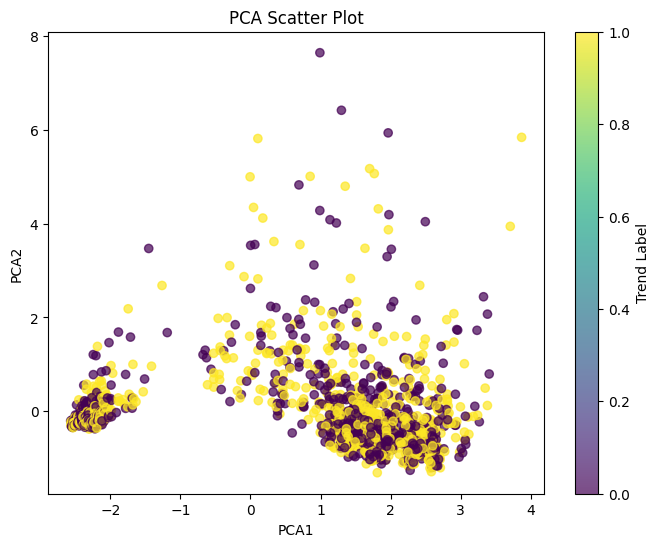

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Trend_Label'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Trend Label')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA Scatter Plot')
plt.show()

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Open_label,PCA1,PCA2,Trend,Trend_Label
0,6/29/2010,-1.203215,-1.147419,-1.211450,-1.151173,3.375219,13,-1.453069,3.851756,Neutral,NaN
1,6/30/2010,-1.131197,-1.090764,-1.149400,-1.151809,3.007510,156,-1.451483,3.471976,Downtrend,0.0
2,7/1/2010,-1.139576,-1.137802,-1.182041,-1.171642,0.919286,142,-2.017901,1.461430,Downtrend,0.0
3,7/2/2010,-1.160789,-1.167280,-1.198846,-1.200915,0.202356,89,-2.241312,0.778431,Downtrend,0.0
4,7/6/2010,-1.192608,-1.199684,-1.229871,-1.233688,0.604503,27,-2.204344,1.183889,Downtrend,0.0


Logistic Regression

# Logistic Regression

In [ ]:
df = df.drop(columns=['Date'])
df = df.dropna()

In [ ]:
label_encoder = LabelEncoder()
df['Trend'] = label_encoder.fit_transform(df['Trend'])

In [ ]:
label_encoder = LabelEncoder()
df['Trend_Label'] = label_encoder.fit_transform(df['Trend_Label'])

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Open_label,PCA1,PCA2,Trend,Trend_Label
1,-1.131197,-1.090764,-1.149400,-1.151809,3.007510,156,-1.451483,3.471976,0,0
2,-1.139576,-1.137802,-1.182041,-1.171642,0.919286,142,-2.017901,1.461430,0,0
3,-1.160789,-1.167280,-1.198846,-1.200915,0.202356,89,-2.241312,0.778431,0,0
4,-1.192608,-1.199684,-1.229871,-1.233688,0.604503,27,-2.204344,1.183889,0,0
5,-1.230792,-1.234910,-1.239028,-1.236976,0.617263,1,-2.242823,1.206509,0,0


In [ ]:
df.head()

,Open,High,Low,Close,Volume,Open_label,PCA1,PCA2,Trend,Trend_Label,Close-Open,High-Low
1,-1.131197,-1.090764,-1.149400,-1.151809,3.007510,156,-1.451483,3.471976,0,0,-0.020612,0.058636
2,-1.139576,-1.137802,-1.182041,-1.171642,0.919286,142,-2.017901,1.461430,0,0,-0.032066,0.044239
3,-1.160789,-1.167280,-1.198846,-1.200915,0.202356,89,-2.241312,0.778431,0,0,-0.040126,0.031567
4,-1.192608,-1.199684,-1.229871,-1.233688,0.604503,27,-2.204344,1.183889,0,0,-0.041080,0.030188
5,-1.230792,-1.234910,-1.239028,-1.236976,0.617263,1,-2.242823,1.206509,0,0,-0.006184,0.004118


Separating training and testing data

In [ ]:
train_size = int(0.8 * len(df))  #Splitting
train_data = df[:train_size]
test_data = df[train_size:]

In [ ]:
X = train_data[['Open','Close','Volume','High','Low','Close-Open','High-Low']]
y = train_data['Trend_Label']

In [ ]:
x_test = test_data[['Open','Close','Volume','High','Low','Close-Open','High-Low']]
y_test = test_data['Trend_Label']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=2022)


Without hyperparameters


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.69      0.77       141
           1       0.73      0.90      0.80       130

    accuracy                           0.79       271
   macro avg       0.80      0.79      0.79       271
weighted avg       0.81      0.79      0.79       271

Logistic Regression Confusion Matrix:
[[ 97  44]
 [ 13 117]]


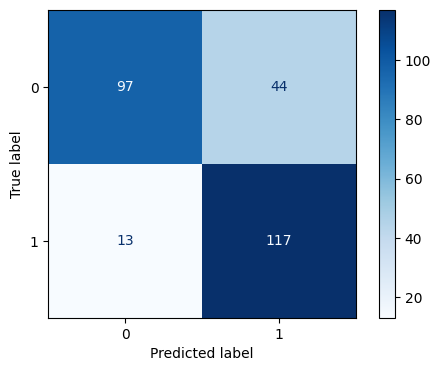

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_valid)

print("Logistic Regression Classification Report:")
print(classification_report(y_valid, logreg_predictions))

cm_logreg = confusion_matrix(y_valid, logreg_predictions)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logreg.classes_)
disp_logreg.plot(cmap='Blues')
print("Logistic Regression Confusion Matrix:")
print(cm_logreg)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

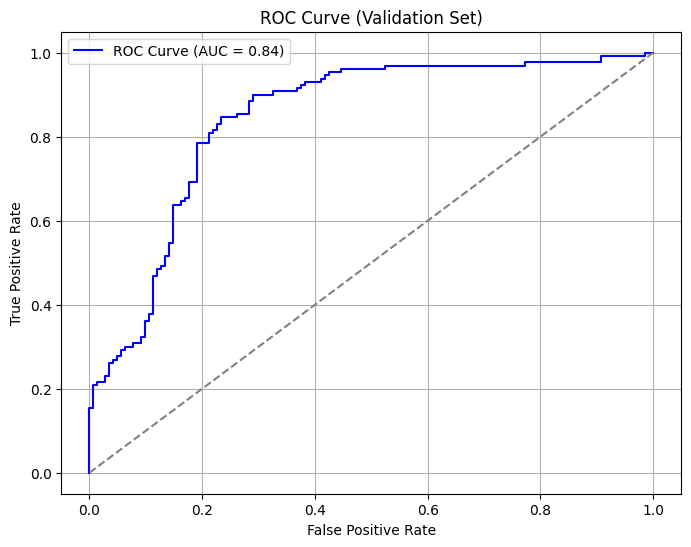

In [ ]:
y_valid_prob = logreg.predict_proba(X_valid)[:, 1]
roc_auc = roc_auc_score(y_valid, y_valid_prob)
fpr, tpr, thresholds = roc_curve(y_valid, y_valid_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Validation Set)')
plt.legend()
plt.grid()
plt.show()

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.67      0.76       165
           1       0.74      0.90      0.82       174

    accuracy                           0.79       339
   macro avg       0.81      0.79      0.79       339
weighted avg       0.80      0.79      0.79       339

Logistic Regression Confusion Matrix:
[[111  54]
 [ 17 157]]


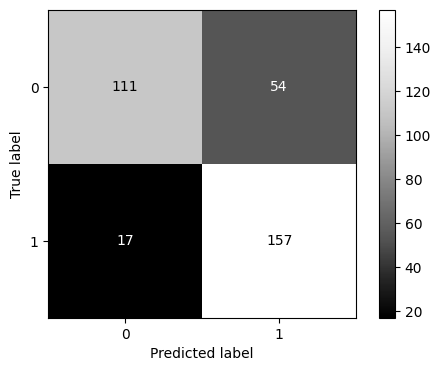

In [ ]:
##Testing part
logreg_predictions = logreg.predict(x_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions))

cm_logreg = confusion_matrix(y_test, logreg_predictions)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logreg.classes_)
disp_logreg.plot(cmap='Greys_r')
print("Logistic Regression Confusion Matrix:")
print(cm_logreg)

With hyperparameters

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 500,1000],
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train,y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred))




Best Parameters: {'C': 100, 'max_iter': 100, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       199
           1       0.85      0.87      0.86       207

    accuracy                           0.85       406
   macro avg       0.85      0.85      0.85       406
weighted avg       0.85      0.85      0.85       406



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       141
           1       0.82      0.69      0.75       130

    accuracy                           0.78       271
   macro avg       0.78      0.78      0.78       271
weighted avg       0.78      0.78      0.78       271

Logistic Regression Confusion Matrix:
[[121  20]
 [ 40  90]]


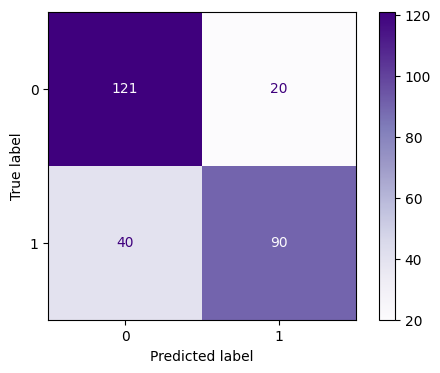

In [ ]:
logreg = LogisticRegression(max_iter=1000,penalty='l2',random_state=2022,class_weight='balanced')
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_valid)

print("Logistic Regression Classification Report:")
print(classification_report(y_valid, logreg_predictions))

cm_logreg = confusion_matrix(y_valid, logreg_predictions)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logreg.classes_)
disp_logreg.plot(cmap='Purples')
print("Logistic Regression Confusion Matrix:")
print(cm_logreg)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       199
           1       0.87      0.74      0.80       207

    accuracy                           0.81       406
   macro avg       0.82      0.81      0.81       406
weighted avg       0.82      0.81      0.81       406

Logistic Regression Confusion Matrix:
[[176  23]
 [ 54 153]]


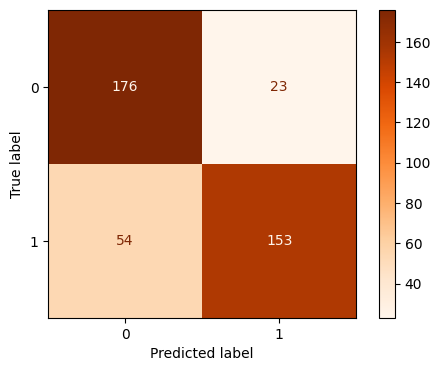

In [ ]:
##Testing part
logreg_predictions = logreg.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions))

cm_logreg = confusion_matrix(y_test, logreg_predictions)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logreg.classes_)
disp_logreg.plot(cmap='Oranges')
print("Logistic Regression Confusion Matrix:")
print(cm_logreg)

Using Best Hyperparameters


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       141
           1       0.79      0.85      0.81       130

    accuracy                           0.82       271
   macro avg       0.82      0.82      0.82       271
weighted avg       0.82      0.82      0.82       271

Logistic Regression Confusion Matrix:
[[111  30]
 [ 20 110]]


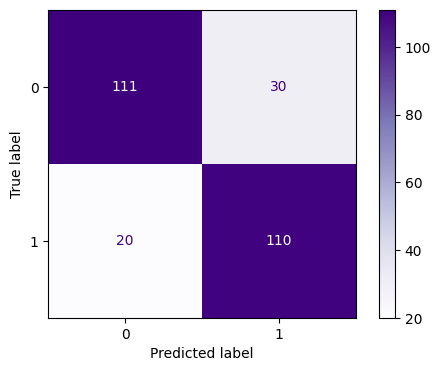

In [ ]:
logreg = LogisticRegression(max_iter=100,penalty='l2',C=100)
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_valid)

print("Logistic Regression Classification Report:")
print(classification_report(y_valid, logreg_predictions))

cm_logreg = confusion_matrix(y_valid, logreg_predictions)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logreg.classes_)
disp_logreg.plot(cmap='Purples')
print("Logistic Regression Confusion Matrix:")
print(cm_logreg)

Testing accuracy for hyperparameter used model

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       199
           1       0.85      0.87      0.86       207

    accuracy                           0.85       406
   macro avg       0.85      0.85      0.85       406
weighted avg       0.85      0.85      0.85       406

Logistic Regression Confusion Matrix:
[[166  33]
 [ 27 180]]


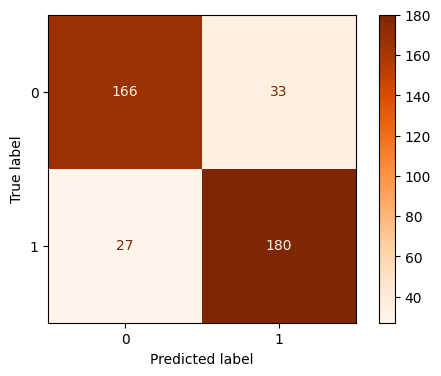

In [ ]:
##Testing part
logreg_predictions = logreg.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions))

cm_logreg = confusion_matrix(y_test, logreg_predictions)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logreg.classes_)
disp_logreg.plot(cmap='Oranges')
print("Logistic Regression Confusion Matrix:")
print(cm_logreg)

# **Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel='poly',probability=True)
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_valid)

In [ ]:
print("SVM Classification Report:")
print(classification_report(y_valid, svm_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.13      0.23       141
           1       0.51      0.97      0.67       130

    accuracy                           0.54       271
   macro avg       0.67      0.55      0.45       271
weighted avg       0.67      0.54      0.44       271



SVM Confusion Matrix:
[[ 19 122]
 [  4 126]]


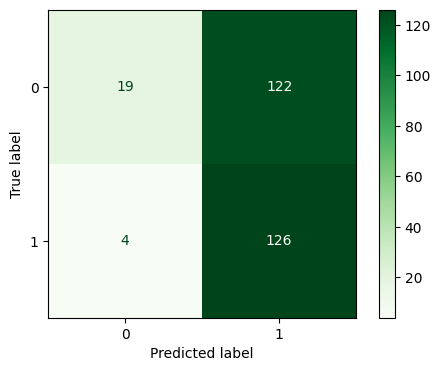

In [ ]:
cm_svm = confusion_matrix(y_valid, svm_predictions)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm.classes_)
disp_svm.plot(cmap='Greens')
print("SVM Confusion Matrix:")
print(cm_svm)


In [ ]:
svm = SVC(kernel='linear',probability=True)
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_valid)

In [ ]:
print("SVM Classification Report:")
print(classification_report(y_valid, svm_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.34      0.48       141
           1       0.56      0.92      0.70       130

    accuracy                           0.62       271
   macro avg       0.70      0.63      0.59       271
weighted avg       0.70      0.62      0.59       271



SVM Confusion Matrix:
[[ 48  93]
 [ 10 120]]


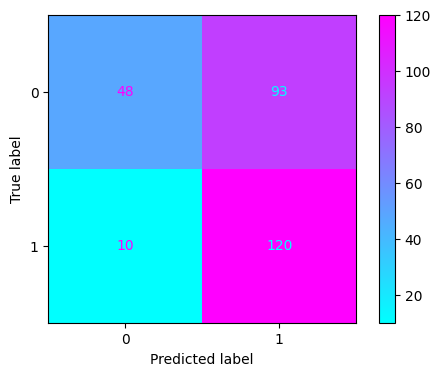

In [ ]:
cm_svm = confusion_matrix(y_valid, svm_predictions)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm.classes_)
disp_svm.plot(cmap='cool')
print("SVM Confusion Matrix:")
print(cm_svm)


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.34      0.49       199
           1       0.60      0.96      0.74       207

    accuracy                           0.65       406
   macro avg       0.74      0.65      0.61       406
weighted avg       0.74      0.65      0.61       406

SVM Confusion Matrix:
[[ 67 132]
 [  9 198]]


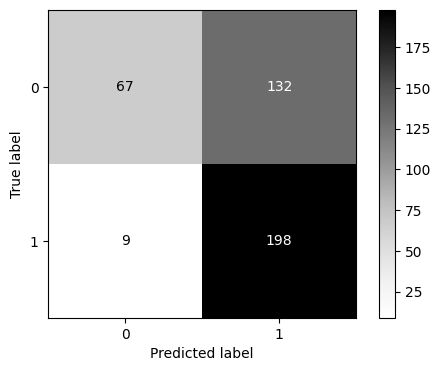

In [ ]:

svm_predictions = svm.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))
cm_svm = confusion_matrix(y_test, svm_predictions)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm.classes_)
disp_svm.plot(cmap='Greys')
print("SVM Confusion Matrix:")
print(cm_svm)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Cross Validation

In [ ]:
param_grid = [
    {
        'kernel': ['linear'],
        'C': [0.01, 0.1, 1, 10, 100]
    },
    {
        'kernel': ['poly'],
        'C': [0.01, 0.1, 1, 10, 100],
        'degree': [2, 3, 4],
        'gamma': ['scale', 'auto', 0.001, 0.01],
        'coef0': [0.0, 0.5, 1.0]
    },
    {
        'kernel': ['rbf'],
        'C': [0.01, 0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.001, 0.01]
    }
]

svm = SVC(probability=True)
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_




In [ ]:
best_model.predict(X_test)
print("Best Parameters from Grid Search:", grid_search.best_params_)

Best Parameters from Grid Search: {'C': 100, 'coef0': 1.0, 'degree': 4, 'gamma': 'auto', 'kernel': 'poly'}


In [ ]:
svm = SVC(kernel='poly',C=100,coef0=1.0,degree=4,gamma='scale',probability=True)
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)

In [ ]:
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       199
           1       0.85      0.84      0.84       207

    accuracy                           0.84       406
   macro avg       0.84      0.84      0.84       406
weighted avg       0.84      0.84      0.84       406



SVM Confusion Matrix:
[[168  31]
 [ 33 174]]


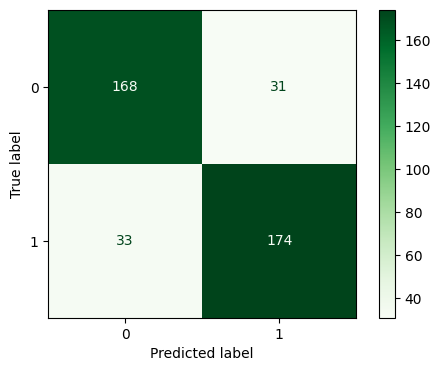

In [ ]:
cm_svm = confusion_matrix(y_test, svm_predictions)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm.classes_)
disp_svm.plot(cmap='Greens')
print("SVM Confusion Matrix:")
print(cm_svm)

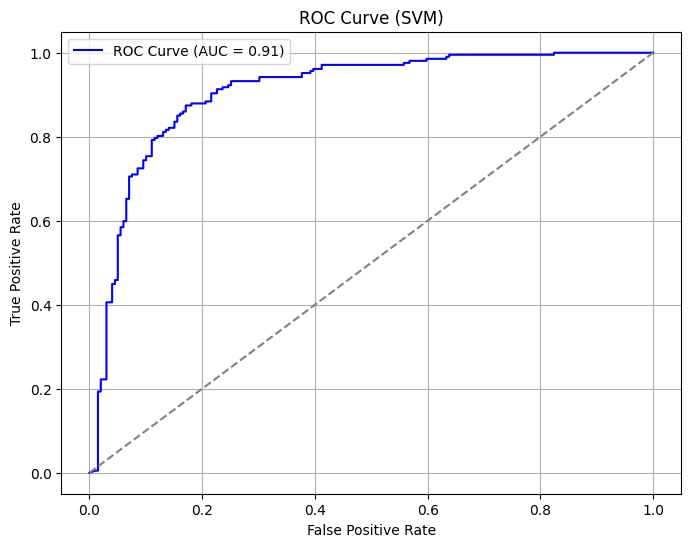

In [ ]:
y_test_prob = svm.predict_proba(X_test)[:, 1]  #
roc_auc = roc_auc_score(y_test, y_test_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM)')
plt.legend()
plt.grid()
plt.show()

**XGBoost Model**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from xgboost import plot_importance
import xgboost as xgb


# Define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X, label=y)

# Split into training and testing sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# split X and y into training and testing sets
print("\nData Split:")
print(f"Training Data: {X_train.shape}")
print(f"Validation Data: {X_valid.shape}")



Data Split:
Training Data: (1081, 7)
Validation Data: (271, 7)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)


Cross-Validation and Model Optimization

With Hyperparameters

In [ ]:
print("\nData Split Complete!")
print(f"Training Data Shape: {X_train.shape}")
print(f"Validation Data Shape: {X_valid.shape}")

# Convert the dataset into DMatrix (XGBoost's internal data structure)
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# Define parameter grid for XGBoost
param = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 5,
    'learning_rate': 0.1,
    # 'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Perform cross-validation using XGBoost's cv method
cv_results = xgb.cv(
    param,
    dtrain,
    num_boost_round=1000,
    nfold=3,
    metrics={'logloss'},
    early_stopping_rounds=10,
    seed=42
)

# Get the best number of boosting rounds
best_num_rounds = cv_results['test-logloss-mean'].idxmin()
print(f"\nBest Number of Boosting Rounds: {best_num_rounds}")

# Train the model using the best number of boosting rounds
model = xgb.train(
    param,
    dtrain,
    num_boost_round=best_num_rounds
)

# Make predictions on the validation set
y_pred_proba = model.predict(dvalid)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred)
print(f"\nAccuracy (with XGBoost cv tuning): {accuracy:.2f}")







Data Split Complete!
Training Data Shape: (1081, 7)
Validation Data Shape: (271, 7)

Best Number of Boosting Rounds: 41

Accuracy (with XGBoost cv tuning): 0.84


Without hyperparameters

In [ ]:
# Train the model with default parameters (no hyperparameters specified)
model = xgb.train({}, dtrain, num_boost_round=100)

# Make predictions on the validation set
y_pred_proba = model.predict(dvalid)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred)
print(f"\nAccuracy (without hyperparameter tuning): {accuracy:.2f}")



Accuracy (without hyperparameter tuning): 0.80


GridSearchCV for hyperparameter tuning and Evaluation of XGBoost Classifier

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score


# Custom wrapper class for XGBClassifier
class XGBClassifierWrapper(BaseEstimator):
    def __init__(self, **params):
        # Pass all received parameters to the XGBClassifier
        self.model = xgb.XGBClassifier(**params)

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def set_params(self, **params):
        # Ensure that parameters are correctly passed to the XGBClassifier
        self.model.set_params(**params)
        return self



# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the custom wrapper model
xgb_clf_wrapper = XGBClassifierWrapper()

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_clf_wrapper, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the model on the training data using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator from GridSearchCV
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict and evaluate on training data
train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)

# Predict and evaluate on testing data
test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)

# Print results
print(f"Best Parameters: {best_params}")
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}
Training Accuracy: 0.9250693802035153
Testing Accuracy: 0.8571428571428571
